# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Загрузка данных
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('submission.csv')
test.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1357,40,104.50,4036.85,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
321,2,94.20,167.5,Male,0,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
500,2,82.00,184.65,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1482,46,20.20,917.45,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check


In [4]:
# Проверим, есть ли пропущенные значения в датасете
pd.DataFrame(data.isnull().sum())

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [7]:
# Разобьем первоначальные данные на категориальные и численные для удобства

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

In [8]:
feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [9]:
# Поправим значения в колонке TotalSpent
spaces = []
for idx, i in enumerate(data['TotalSpent']):
    if i == ' ':
        spaces.append(idx)
data.drop(labels=spaces, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

test.loc[test['TotalSpent'] == ' ', 'TotalSpent'] = -1

In [10]:
data['TotalSpent'] = data['TotalSpent'].astype(float)
test['TotalSpent'] = test['TotalSpent'].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

## Анализ данных

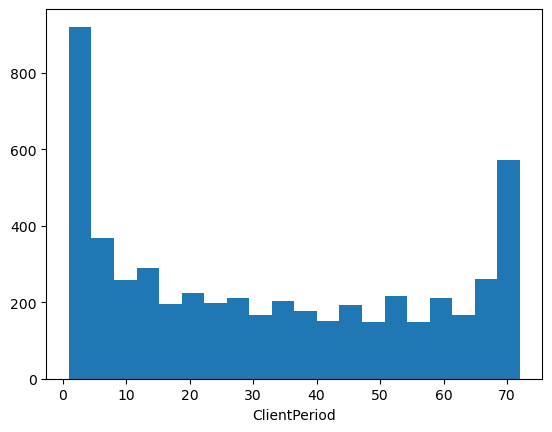

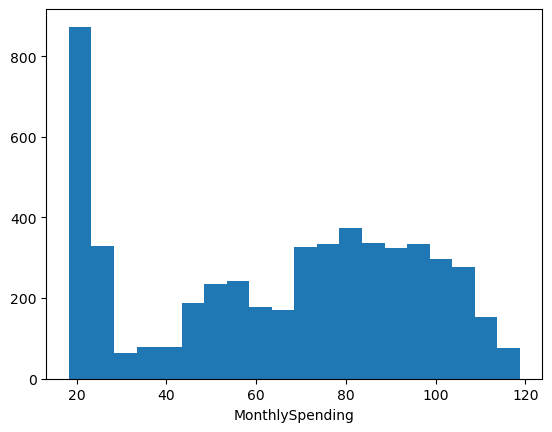

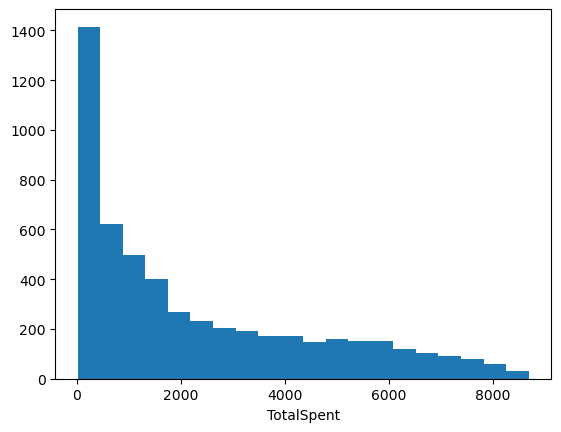

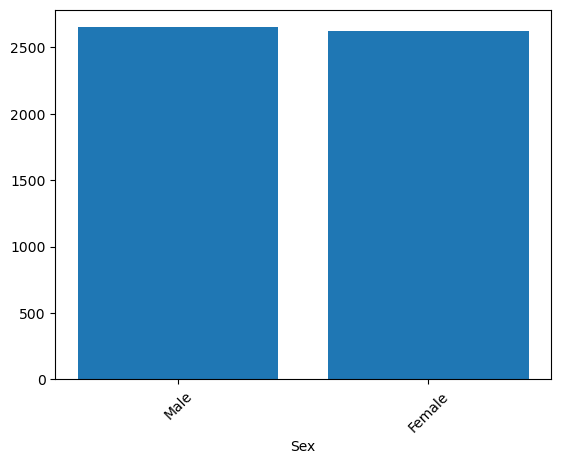

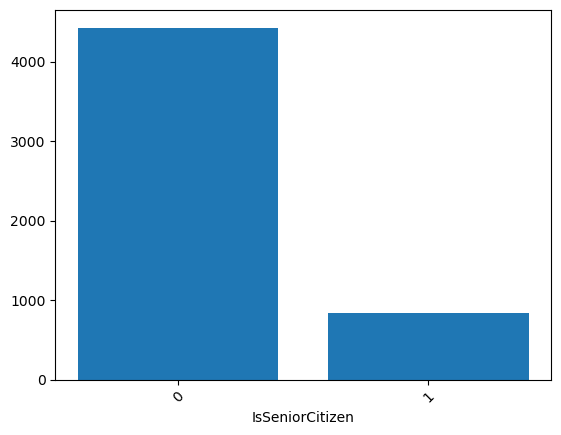

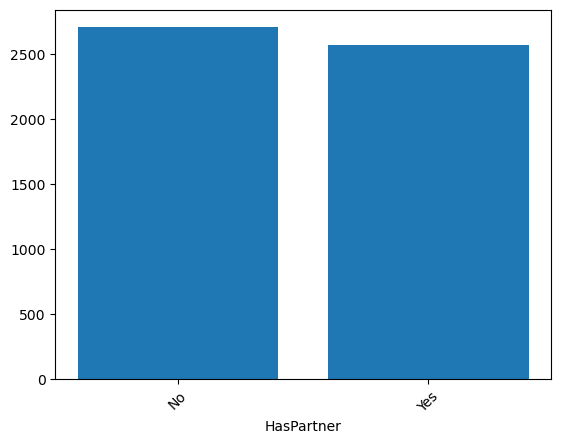

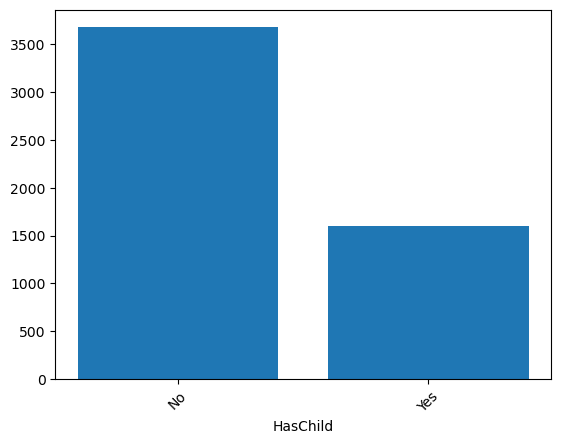

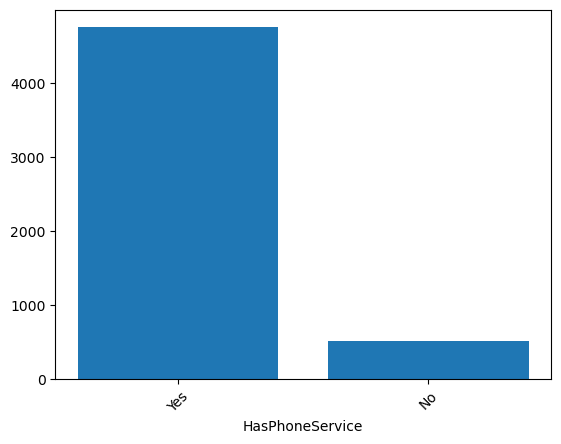

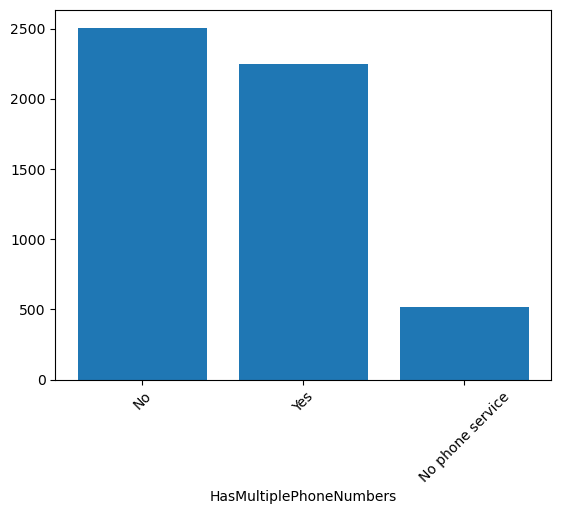

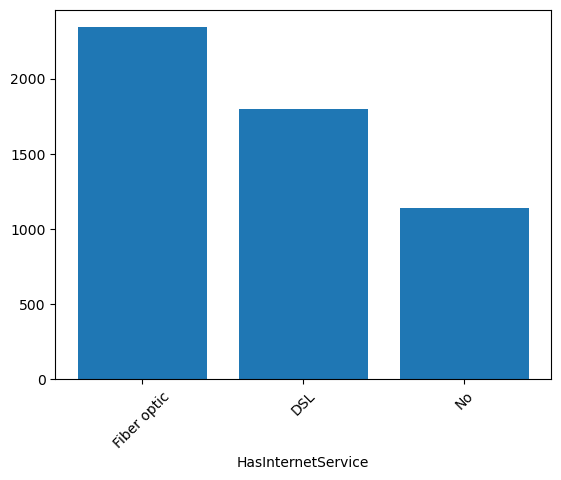

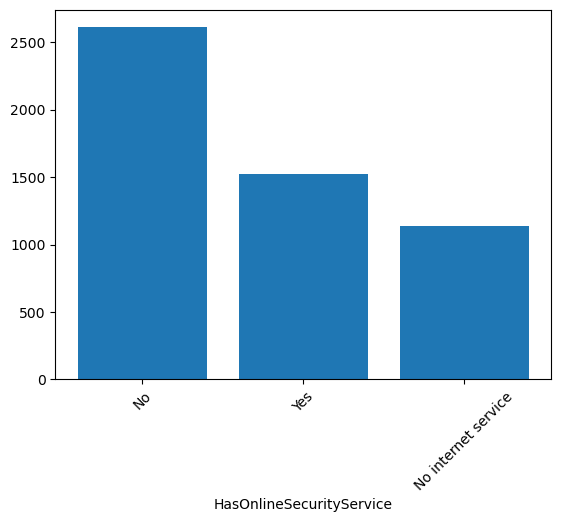

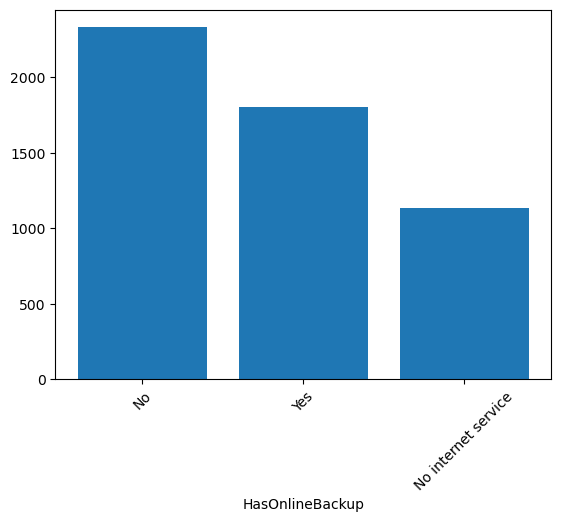

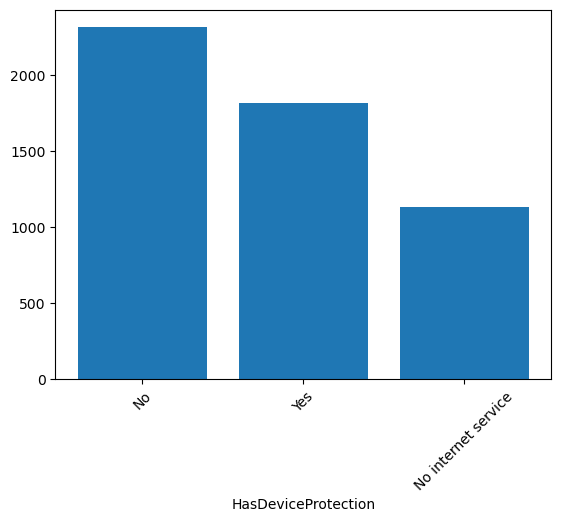

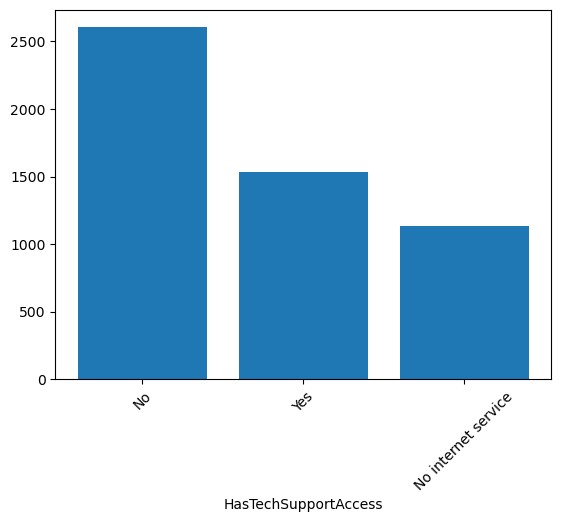

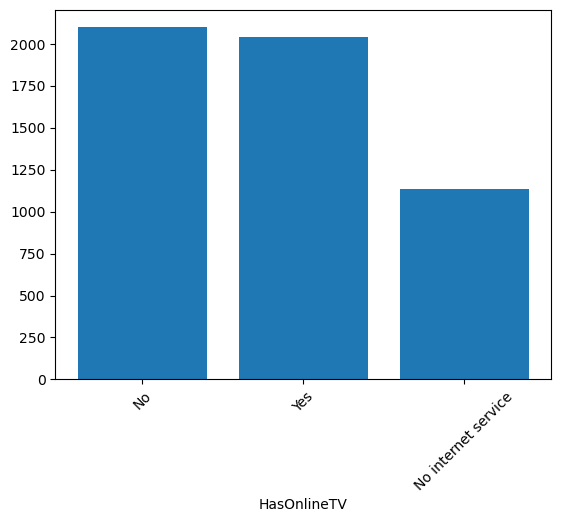

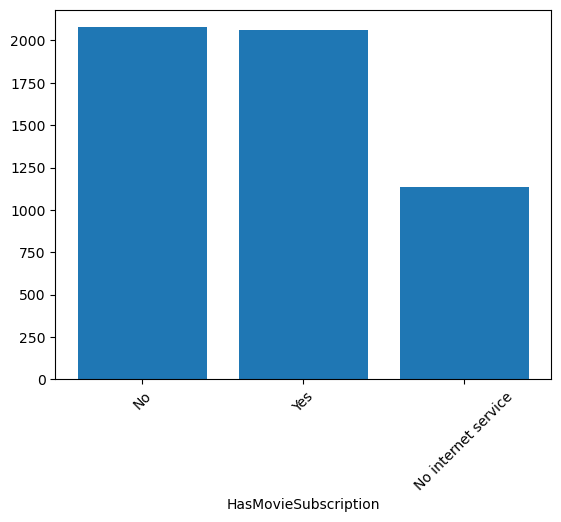

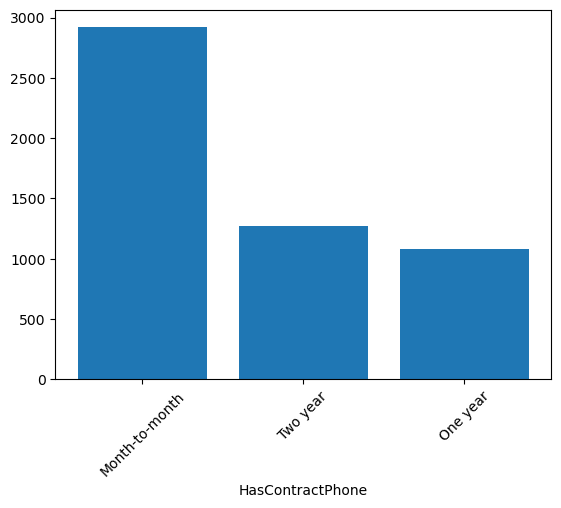

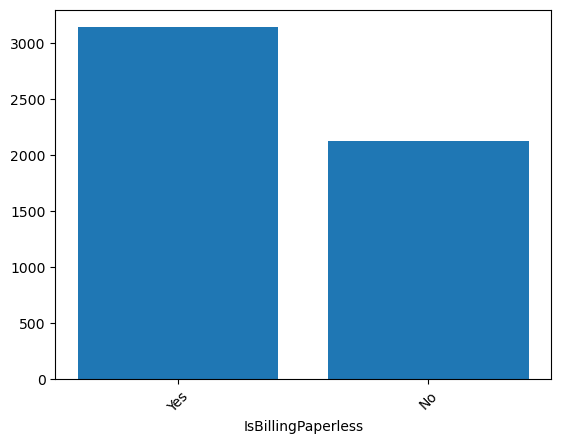

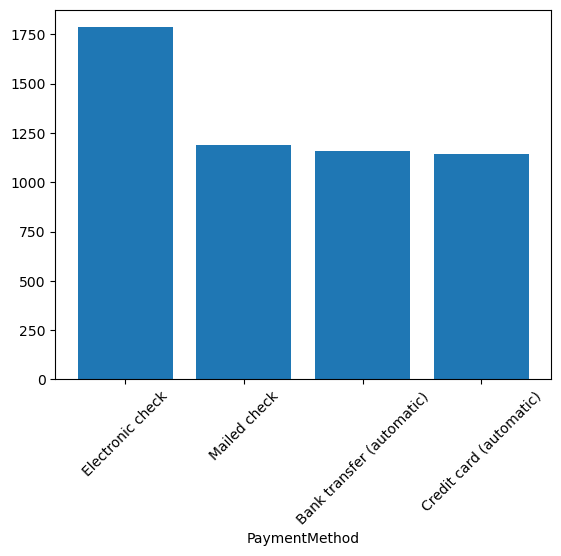

In [13]:
# Посмотрим на распределения признаков: для численных - гистограммы, для категориальных - количество 
# каждого значения для каждого признака
for col in num_cols:
    plt.hist(data[col], bins=20)
    plt.xlabel(col)
    plt.show()

for col in cat_cols:
    x = data[col].value_counts()
    plt.bar(x.index, x.values)
    plt.xlabel(col)
    plt.xticks(data[col].value_counts().index, rotation=45)
    plt.show()

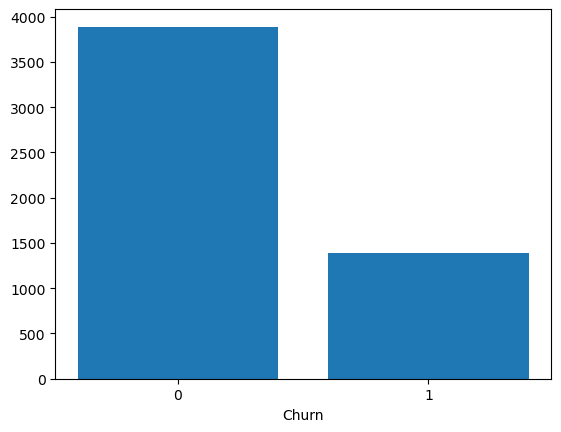

In [14]:
# Посмотрим на распределение целевой переменной
plt.bar(data[target_col].value_counts().index, data[target_col].value_counts().values)
plt.xlabel(target_col)
plt.xticks(data[target_col].value_counts().index)
plt.show()

Классы очень несбалансированы, значение "0" в 2.5 раза превышает значение "1". В связи с этим применять метрику Accuracy не будем

<Axes: >

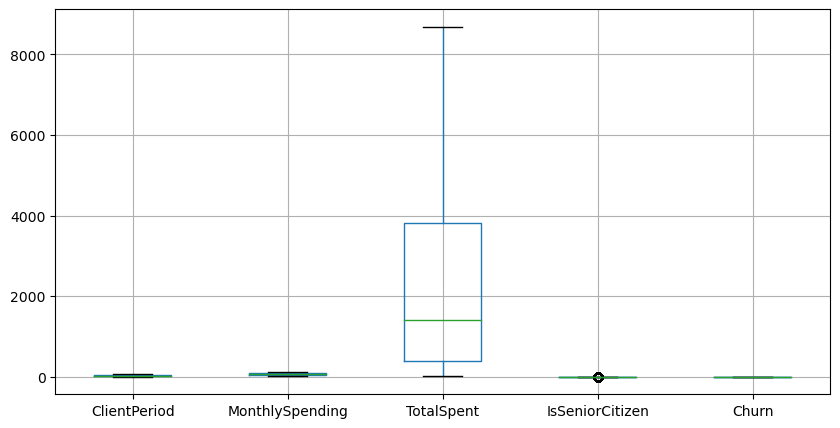

In [15]:
# Для того чтобы проверить распределение признаков, посмотрим на ящики с усами (boxplot)
data.boxplot(figsize=(10,5))

Выбросы в данных отсутствуют

In [16]:
# Переведем некоторые категориальные признаки в бинарную систему для удобства 
# применения различных моделей машинного обучения
data['Sex'] = np.where(data['Sex']=='Male', 1, 0)
data['HasPartner'] = np.where(data['HasPartner']=='Yes', 1, 0)
data['HasChild'] = np.where(data['HasChild']=='Yes', 1, 0)
data['HasPhoneService'] = np.where(data['HasPhoneService']=='Yes', 1, 0)
data['IsBillingPaperless'] = np.where(data['IsBillingPaperless']=='Yes', 1, 0)

test['Sex'] = np.where(test['Sex']=='Male', 1, 0)
test['HasPartner'] = np.where(test['HasPartner']=='Yes', 1, 0)
test['HasChild'] = np.where(test['HasChild']=='Yes', 1, 0)
test['HasPhoneService'] = np.where(test['HasPhoneService']=='Yes', 1, 0)
test['IsBillingPaperless'] = np.where(test['IsBillingPaperless']=='Yes', 1, 0)

data.loc[data['HasMultiplePhoneNumbers'] == 'Yes', 'HasMultiplePhoneNumbers'] = 1
data.loc[data['HasMultiplePhoneNumbers'] == 'No', 'HasMultiplePhoneNumbers'] = 0
data.loc[data['HasMultiplePhoneNumbers'] == 'No phone service', 'HasMultiplePhoneNumbers'] = -1
data['HasMultiplePhoneNumbers'] = data['HasMultiplePhoneNumbers'].astype(int)

data.loc[data['HasInternetService'] == 'Fiber optic', 'HasInternetService'] = 1
data.loc[data['HasInternetService'] == 'No', 'HasInternetService'] = 0
data.loc[data['HasInternetService'] == 'DSL', 'HasInternetService'] = -1
data['HasInternetService'] = data['HasInternetService'].astype(int)

data.loc[data['HasOnlineSecurityService'] == 'Yes', 'HasOnlineSecurityService'] = 1
data.loc[data['HasOnlineSecurityService'] == 'No', 'HasOnlineSecurityService'] = 0
data.loc[data['HasOnlineSecurityService'] == 'No internet service', 'HasOnlineSecurityService'] = -1
data['HasOnlineSecurityService'] = data['HasOnlineSecurityService'].astype(int)

data.loc[data['HasOnlineBackup'] == 'Yes', 'HasOnlineBackup'] = 1
data.loc[data['HasOnlineBackup'] == 'No', 'HasOnlineBackup'] = 0
data.loc[data['HasOnlineBackup'] == 'No internet service', 'HasOnlineBackup'] = -1
data['HasOnlineBackup'] = data['HasOnlineBackup'].astype(int)

data.loc[data['HasDeviceProtection'] == 'Yes', 'HasDeviceProtection'] = 1
data.loc[data['HasDeviceProtection'] == 'No', 'HasDeviceProtection'] = 0
data.loc[data['HasDeviceProtection'] == 'No internet service', 'HasDeviceProtection'] = -1
data['HasDeviceProtection'] = data['HasDeviceProtection'].astype(int)

data.loc[data['HasTechSupportAccess'] == 'Yes', 'HasTechSupportAccess'] = 1
data.loc[data['HasTechSupportAccess'] == 'No', 'HasTechSupportAccess'] = 0
data.loc[data['HasTechSupportAccess'] == 'No internet service', 'HasTechSupportAccess'] = -1
data['HasTechSupportAccess'] = data['HasTechSupportAccess'].astype(int)

data.loc[data['HasOnlineTV'] == 'Yes', 'HasOnlineTV'] = 1
data.loc[data['HasOnlineTV'] == 'No', 'HasOnlineTV'] = 0
data.loc[data['HasOnlineTV'] == 'No internet service', 'HasOnlineTV'] = -1
data['HasOnlineTV'] = data['HasOnlineTV'].astype(int)

data.loc[data['HasMovieSubscription'] == 'Yes', 'HasMovieSubscription'] = 1
data.loc[data['HasMovieSubscription'] == 'No', 'HasMovieSubscription'] = 0
data.loc[data['HasMovieSubscription'] == 'No internet service', 'HasMovieSubscription'] = -1
data['HasMovieSubscription'] = data['HasMovieSubscription'].astype(int)

test.loc[test['HasMultiplePhoneNumbers'] == 'Yes', 'HasMultiplePhoneNumbers'] = 1
test.loc[test['HasMultiplePhoneNumbers'] == 'No', 'HasMultiplePhoneNumbers'] = 0
test.loc[test['HasMultiplePhoneNumbers'] == 'No phone service', 'HasMultiplePhoneNumbers'] = -1
test['HasMultiplePhoneNumbers'] = test['HasMultiplePhoneNumbers'].astype(int)

test.loc[test['HasInternetService'] == 'Fiber optic', 'HasInternetService'] = 1
test.loc[test['HasInternetService'] == 'No', 'HasInternetService'] = 0
test.loc[test['HasInternetService'] == 'DSL', 'HasInternetService'] = -1
test['HasInternetService'] = test['HasInternetService'].astype(int)

test.loc[test['HasOnlineSecurityService'] == 'Yes', 'HasOnlineSecurityService'] = 1
test.loc[test['HasOnlineSecurityService'] == 'No', 'HasOnlineSecurityService'] = 0
test.loc[test['HasOnlineSecurityService'] == 'No internet service', 'HasOnlineSecurityService'] = -1
test['HasOnlineSecurityService'] = test['HasOnlineSecurityService'].astype(int)

test.loc[test['HasOnlineBackup'] == 'Yes', 'HasOnlineBackup'] = 1
test.loc[test['HasOnlineBackup'] == 'No', 'HasOnlineBackup'] = 0
test.loc[test['HasOnlineBackup'] == 'No internet service', 'HasOnlineBackup'] = -1
test['HasOnlineBackup'] = test['HasOnlineBackup'].astype(int)

test.loc[test['HasDeviceProtection'] == 'Yes', 'HasDeviceProtection'] = 1
test.loc[test['HasDeviceProtection'] == 'No', 'HasDeviceProtection'] = 0
test.loc[test['HasDeviceProtection'] == 'No internet service', 'HasDeviceProtection'] = -1
test['HasDeviceProtection'] = test['HasDeviceProtection'].astype(int)

test.loc[test['HasTechSupportAccess'] == 'Yes', 'HasTechSupportAccess'] = 1
test.loc[test['HasTechSupportAccess'] == 'No', 'HasTechSupportAccess'] = 0
test.loc[test['HasTechSupportAccess'] == 'No internet service', 'HasTechSupportAccess'] = -1
test['HasTechSupportAccess'] = test['HasTechSupportAccess'].astype(int)

test.loc[test['HasOnlineTV'] == 'Yes', 'HasOnlineTV'] = 1
test.loc[test['HasOnlineTV'] == 'No', 'HasOnlineTV'] = 0
test.loc[test['HasOnlineTV'] == 'No internet service', 'HasOnlineTV'] = -1
test['HasOnlineTV'] = test['HasOnlineTV'].astype(int)

test.loc[test['HasMovieSubscription'] == 'Yes', 'HasMovieSubscription'] = 1
test.loc[test['HasMovieSubscription'] == 'No', 'HasMovieSubscription'] = 0
test.loc[test['HasMovieSubscription'] == 'No internet service', 'HasMovieSubscription'] = -1
test['HasMovieSubscription'] = test['HasMovieSubscription'].astype(int)

In [17]:
# Посмотрим на корреляцию численных признаков с целевой переменной
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15672\3208545593.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,IsBillingPaperless,Churn
ClientPeriod,1.000000,0.248583,0.826332,0.006122,0.010597,0.373007,0.150044,0.012398,0.262684,0.000097,0.237825,0.255655,0.256952,0.230083,0.198412,0.208902,0.007524,-0.352613
MonthlySpending,0.248583,1.000000,0.652034,-0.011268,0.215202,0.088851,-0.124420,0.251842,0.488353,0.535245,0.632767,0.711221,0.737078,0.656637,0.822346,0.819382,0.344988,0.184341
TotalSpent,0.826332,0.652034,1.000000,0.006151,0.093987,0.310658,0.049986,0.116034,0.411947,0.230880,0.487532,0.539777,0.549242,0.494460,0.535101,0.542476,0.156383,-0.201294
Sex,0.006122,-0.011268,0.006151,1.000000,0.013134,0.003366,0.014948,-0.009006,-0.007194,-0.001079,-0.010770,-0.007130,-0.003280,-0.012912,-0.011514,-0.008267,-0.016350,-0.008453
IsSeniorCitizen,0.010597,0.215202,0.093987,0.013134,1.000000,0.017379,-0.216340,0.008472,0.107603,0.194717,0.082814,0.145113,0.131919,0.070067,0.165610,0.177277,0.151747,0.156502
HasPartner,0.373007,0.088851,0.310658,0.003366,0.017379,1.000000,0.441713,0.002364,0.104341,-0.004318,0.090716,0.085328,0.097349,0.076713,0.073702,0.074920,-0.004053,-0.147707
HasChild,0.150044,-0.124420,0.049986,0.014948,-0.216340,0.441713,1.000000,-0.009440,-0.028148,-0.124517,-0.036508,-0.074183,-0.082177,-0.051289,-0.097538,-0.103497,-0.099692,-0.162438
HasPhoneService,0.012398,0.251842,0.116034,-0.009006,0.008472,0.002364,-0.009440,1.000000,0.679162,0.414545,-0.162884,-0.125618,-0.138773,-0.166463,-0.108767,-0.110982,0.021475,0.010449
HasMultiplePhoneNumbers,0.262684,0.488353,0.411947,-0.007194,0.107603,0.104341,-0.028148,0.679162,1.000000,0.430722,0.068113,0.129730,0.123541,0.058638,0.159798,0.159483,0.132249,0.035183
HasInternetService,0.000097,0.535245,0.230880,-0.001079,0.194717,-0.004318,-0.124517,0.414545,0.430722,1.000000,-0.087616,0.042713,0.048315,-0.084099,0.156870,0.143675,0.219888,0.232623


# Применение моделей. Вторая часть

In [18]:
# Будем использовать две модели: LogisticRegressionCV и RandomForestClassifier (тут будем также использовать GridSearchCV)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   int32  
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   int32  
 6   HasChild                  5273 non-null   int32  
 7   HasPhoneService           5273 non-null   int32  
 8   HasMultiplePhoneNumbers   5273 non-null   int32  
 9   HasInternetService        5273 non-null   int32  
 10  HasOnlineSecurityService  5273 non-null   int32  
 11  HasOnlineBackup           5273 non-null   int32  
 12  HasDeviceProtection       5273 non-null   int32  
 13  HasTechSupportAccess      5273 non-null   int32  
 14  HasOnlin

In [20]:
num_features = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'IsBillingPaperless'
]

cat_features = ['HasContractPhone', 'PaymentMethod']

In [21]:
# Для модели логистической регрессии переведем все данные в численные значения с помощью one hot encoding
dummy_features = pd.get_dummies(data[cat_features])
dummy_features_test = pd.get_dummies(test[cat_features])

X = pd.concat([data[num_features], dummy_features], axis=1)
X.head()
X_test = pd.concat([test[num_features], dummy_features_test], axis=1)
y = data[target_col]
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

In [22]:
# Также для модели логистической регрессии проведем нормализацию данных
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test.values)

lgcv = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True, random_state=42)
lgcv = lgcv.fit(X_train_scaled, y_train)

preds_train = lgcv.predict_proba(X_train_scaled)[:, 1]
preds_val = lgcv.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC модели LogisticRegressionCV на обучении:", roc_auc_score(y_train, preds_train))
print("ROC-AUC модели LogisticRegressionCV на валидации:", roc_auc_score(y_val, preds_val))

ROC-AUC модели LogisticRegressionCV на обучении: 0.845448885089489
ROC-AUC модели LogisticRegressionCV на валидации: 0.840358575135645


In [23]:
# Возьмем несколько параметров для перебора по сетке при применении модели случайного леса
parameters = {'criterion': ('gini', 'entropy', 'log_loss'), 
              'max_depth': [1, 5, 10], 
              'n_estimators': [5, 20, 100], 
              'min_samples_split': [2, 5, 8]
              }
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, verbose=1)
clf.fit(X_train_scaled, y_train)
print("Лучшие гиперпараметры:", clf.best_params_)

preds_train = clf.best_estimator_.predict_proba(X_train_scaled)[:, 1]
preds_val = clf.best_estimator_.predict_proba(X_val_scaled)[:, 1]

print("ROC-AUC модели RandomForestClassifier с применение GridSearchCV на обучении:", roc_auc_score(y_train, preds_train))
print("ROC-AUC модели RandomForestClassifier с применение GridSearchCV на валидации:", roc_auc_score(y_val, preds_val))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие гиперпараметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 20}
ROC-AUC модели RandomForestClassifier с применение GridSearchCV на обучении: 0.8581382509855818
ROC-AUC модели RandomForestClassifier с применение GridSearchCV на валидации: 0.838688369898561


Лучшего качества удалось добиться на валидационной выборке при использовании модели LogisticRegressionCV - 0.84. При использовании RandomForestClassifier с помощью кросс-валидации параметров качество вышло 0.8396

In [24]:
# Применение градиентного бустинга
X_cat = data.drop(columns=['Churn'], axis=1)
y_cat = data['Churn']

X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X_cat, y_cat, train_size=0.8, random_state=42)

In [25]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [26]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import optuna
import catboost as cb

In [28]:
def objective(trial):
    # Определите пространство поиска для гиперпараметров
    param = {
        'iterations': trial.suggest_int("iterations", 100, 1000),
        'learning_rate': trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        'depth': trial.suggest_int("depth", 4, 10),
        'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        'bootstrap_type': trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        'bagging_temperature': trial.suggest_float("bagging_temperature", 0.0, 10.0),
        'od_type': trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        'od_wait': trial.suggest_int("od_wait", 10, 50)
    }

    cat_features = ['HasContractPhone', 'PaymentMethod']

    # Обучить модель, используя заданные гиперпараметры
    model = cb.CatBoostClassifier(**param, cat_features=cat_features)
    model.fit(X_train_cat, y_train_cat, eval_set=(X_val_cat, y_val_cat), early_stopping_rounds=100, verbose=False)

    # Вычислить точность валидации
    valid_pred = model.predict_proba(X_val_cat)[:, 1]
    valid_roc = roc_auc_score(y_val_cat, valid_pred)

    # Возвращаем точность валидации в качестве объективного значения
    return valid_roc

Лучшее качество удалось получить с помощью градиентного бустинга и библиотеки оптимизации гиперпараметров Optuna при параметрах, которые выведены выше. ROC-AUC = 0.846. Следовательно, лучше всего сработала эта модель среди всех остальных.